In [3]:

import pandas as pd

# Load dataset
df = pd.read_csv(r'E:\ml projects\Crop_recommendation (1).csv')


In [4]:
#check null values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
X = df.drop("label", axis=1)
y = df["label"]

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


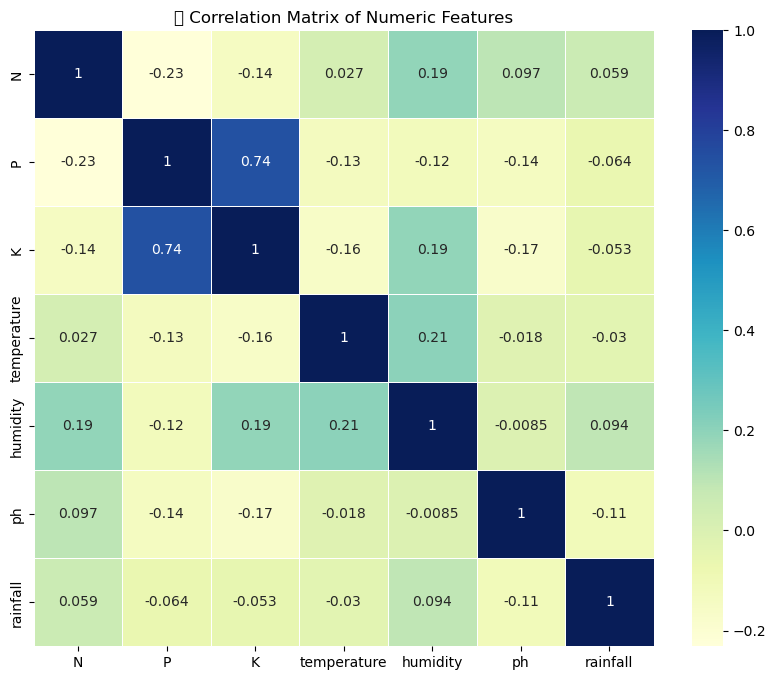

In [22]:
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Numeric Features")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize models
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
from sklearn.metrics import accuracy_score

# Make predictions
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

# Accuracy scores
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)

# Choose best model
best_model = rf_model if rf_accuracy > knn_accuracy else knn_model
best_model_name = "Random Forest" if rf_accuracy > knn_accuracy else "KNN"


In [17]:
import joblib

# Save the selected model
joblib.dump(best_model, "best_crop_model.pkl")


['best_crop_model.pkl']

In [19]:
# Load the saved model (optional step)
model = joblib.load("best_crop_model.pkl")

# Custom input example: [N, P, K, temperature, humidity, pH, rainfall]
custom_input = pd.DataFrame([[90, 42, 43, 20.8, 82.0, 6.5, 202.9]])
prediction = model.predict(custom_input)

print(f" Best Model: {best_model_name}")
print(f" Accuracy - RF: {rf_accuracy:.2f}, KNN: {knn_accuracy:.2f}")
print(f" Recommended Crop: {prediction[0]}")


 Best Model: Random Forest
 Accuracy - RF: 0.99, KNN: 0.97
 Recommended Crop: rice


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


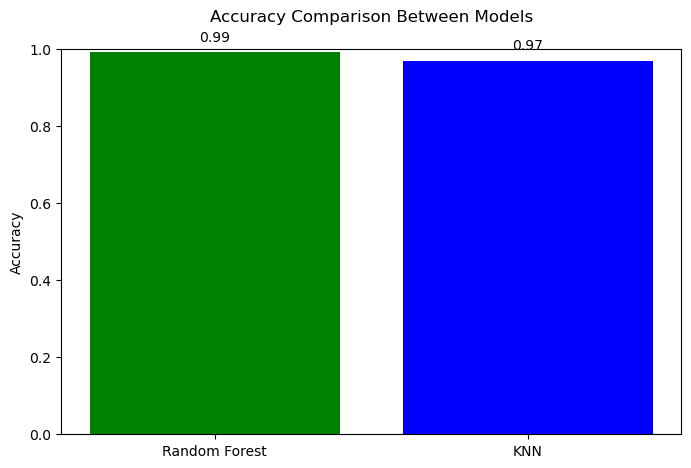

In [28]:
import matplotlib.pyplot as plt

# Accuracy scores from your models
models = ['Random Forest', 'KNN']
accuracy_scores = [rf_accuracy, knn_accuracy]  # replace these variables with your accuracy values

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, accuracy_scores, color=['green', 'blue'])
plt.ylim([0, 1])  # accuracy between 0 and 1
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Between Models',pad=20)

# Adding the accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()
